# Day 2 Task - NYC School Directory

## 1. Loading, Cleaning & Filtering the Dataset

### Step 1:  Loading pandas & reading data from original csv file

In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('high-school-directory.csv')
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


### Step 2: Cleaning the column names

 1. Convert all column names to lowercase

 2. Replace all blank spaces with an underscore ('_')

In [103]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [104]:
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

------------------------
## 2: Grouping & Summarising data

### 1. Count of schools per borough

In [105]:
schools_per_borough = df.groupby("borough")[["dbn"]].nunique().reset_index()
schools_per_borough

,borough,dbn
0,Bronx,118
1,Brooklyn,121
2,Manhattan,106
3,Queens,80
4,Staten Island,10


In [106]:
total_schools = df["dbn"].nunique()
total_schools


435

### 2. Average number of students per Borough

In [107]:
avg_students_per_borough = df.groupby("borough")["total_students"].agg(["mean"])
avg_students_per_borough

,mean
borough,
Bronx,490.406780
Brooklyn,699.134454
Manhattan,589.825243
Queens,1046.644737
Staten Island,1847.500000


### 3. Summary of grade_span_max by Borough

In [108]:
df.groupby("borough")["grade_span_max"].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


--------------------------
## 3: Schools in Brooklyn


### Step 1: Filter the dataset to include only schools located in Brooklyn

In [109]:
df[df["borough"] == "Brooklyn"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


### Step 2: Saving the results of a filter & grouping to new DataFrames

In [110]:
brooklyn_schools = df[df["borough"] == "Brooklyn"]
brooklyn_schools


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,17K524,International High School at Prospect Heights,Brooklyn,K440,718-230-6333,718-230-6322,9.0,12,NaN,NaN,...,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,13509.0,17,2,48,44
423,17K408,Academy of Hospitality and Tourism,Brooklyn,K465,718-564-2580,718-564-2581,9.0,12,NaN,NaN,...,40.0,794.0,3336215.0,3.051030e+09,Erasmus ...,13510.0,60,2,11,43
427,15K592,Khalil Gibran International Academy,Brooklyn,K806,718-237-2502,718-488-1724,9.0,12,NaN,NaN,...,33.0,39.0,3331754.0,3.001740e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,17619.0,68,2,38,54
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53


### Step 3: Adding columns & Sorting Data

#### Added "enrollment_in_10_years" column
Calculating what enrollment will look like in 10 years if it grows by 10%

In [111]:
df["enrollment_in_10_years"] = df["total_students"] * 1.1
df.head()
df.sort_values("total_students", ascending=False).head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts,enrollment_in_10_years
227,13K430,Brooklyn Technical High School,Brooklyn,K430,718-804-6400,718-260-9245,9.0,12,NaN,NaN,...,33.0,3058752.0,3.020980e+09,Fort Greene ...,17619.0,68,2,48,55,6003.8
50,20K490,Fort Hamilton High School,Brooklyn,K490,718-748-1537,718-836-3955,9.0,12,NaN,NaN,...,46.0,3152318.0,3.060130e+09,Bay Ridge ...,17216.0,10,2,44,41,4748.7
159,26Q430,Francis Lewis High School,Queens,Q430,718-281-8200,718-746-2017,9.0,12,NaN,NaN,...,1417.0,4148763.0,4.068820e+09,Auburndale ...,14507.0,26,3,3,69,4463.8
353,21K525,Edward R. Murrow High School,Brooklyn,K525,718-258-9283,718-252-2611,9.0,12,NaN,NaN,...,768.0,3180673.0,3.067340e+09,Midwood ...,13513.0,60,2,18,43,4423.1
419,31R455,Tottenville High School,Staten Island,R455,718-668-8800,718-317-0962,9.0,12,NaN,NaN,...,198.0,5082634.0,5.066130e+09,Annadale-Huguenot-Prince's Bay-Eltingville ...,10699.0,15,1,9,77,4352.7


------------------
## 4: Saving & Loading Brooklyn Schools as a new csv

In [112]:
brooklyn_schools.to_csv("brooklyn_schools.csv", index=False)
pd.read_csv("brooklyn_schools.csv")

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
1,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
2,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
3,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
4,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,17K524,International High School at Prospect Heights,Brooklyn,K440,718-230-6333,718-230-6322,9.0,12,NaN,NaN,...,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,13509.0,17,2,48,44
117,17K408,Academy of Hospitality and Tourism,Brooklyn,K465,718-564-2580,718-564-2581,9.0,12,NaN,NaN,...,40.0,794.0,3336215.0,3.051030e+09,Erasmus ...,13510.0,60,2,11,43
118,15K592,Khalil Gibran International Academy,Brooklyn,K806,718-237-2502,718-488-1724,9.0,12,NaN,NaN,...,33.0,39.0,3331754.0,3.001740e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,17619.0,68,2,38,54
119,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53


-------------------------
## 5. Brooklyn School Analysis

### Reading the new 'brooklyn_schools.csv' as 'df1'

In [113]:
df1 = pd.read_csv('brooklyn_schools.csv')
df1.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
1,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
2,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
3,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
4,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


### Question 1: How many schools are in Brooklyn?

*(Counting unique values only using the DBN column)*

There are **121** unique schools in Brooklyn

In [114]:
num_unique_brooklyn_schools = df2["dbn"].nunique()
num_unique_brooklyn_schools

121

### Question 2: How many schools in Brooklyn offer Grade 9 entry?

*(using range, to avoid missing schools that offer earlier entry)*

**All 121 schools** in Brooklyn offer grade 9 entry

In [115]:
grade_9_entry_schools = (df2["grade_span_min"] <= 9) & (df2["grade_span_max"] >= 9)
grade_9_entry_schools.shape[0]

121

-----------------------------------
## 6. NYC School Analysis Visualisations 

### 6.1 Loading matplotlib to create visualisations

In [116]:
import matplotlib.pyplot as plt

### 6.2 Number of Schools per Borough - Bar Chart

##### Counting Number of Schools by Borough

In [117]:
num_schools = df.groupby('borough')['dbn'].nunique()
num_schools

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

#####  Number of Schools by Borough Visualisation 

<function matplotlib.pyplot.show(close=None, block=None)>

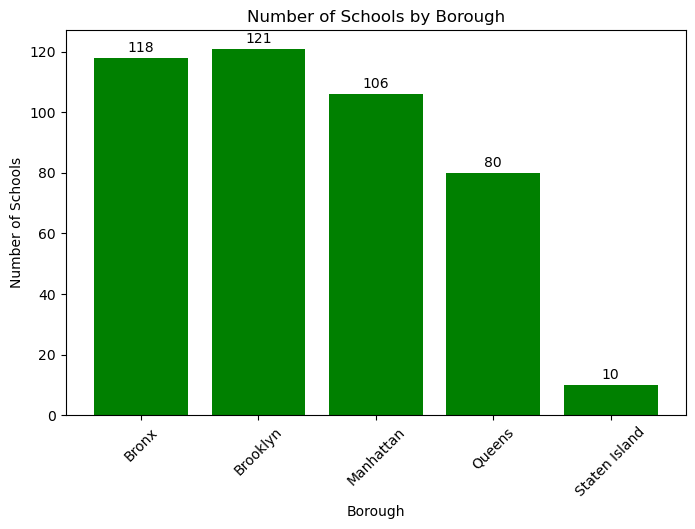

In [118]:
plt.figure(figsize = (8,5))
bars = plt.bar(num_schools.index, num_schools.values, color = 'green')
plt.title('Number of Schools by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1,
             int(height),
             ha='center', va='bottom')
plt.show

### 6.3 Schools with & Without AP courses

#### 6.3.1 Calculations of AP Course Distribution

In [125]:
df['has_any_ap_courses'] = df['advancedplacement_courses'].notnull() | df['online_ap_courses'].notnull()

In [126]:
overall_ap_count = df['has_any_ap_courses'].value_counts()
overall_ap_count.index = ['Has AP', 'No AP']
overall_ap_count

Has AP    345
No AP      90
Name: count, dtype: int64

#### 6.3.2 AP Program Distribution by Visualisation

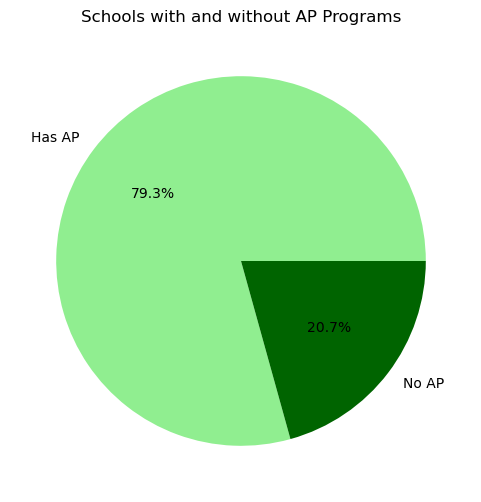

In [124]:
plt.figure(figsize=(6,6))
plt.pie(overall_ap_count, labels=overall_ap_count.index, autopct='%1.1f%%', colors=['lightgreen', 'darkgreen'])
plt.title('Schools with and without AP Programs')
plt.show()


### 6.4 AP Couses by Borough

#### 6.4.1 Grouping AP Courses by Borough

In [122]:
ap_courses_by_borough = df.groupby(['borough', 'has_any_ap_courses']).size().unstack(fill_value=0)
ap_courses_by_borough

has_any_ap_courses,False,True
borough,,
Bronx,31,87
Brooklyn,25,96
Manhattan,19,87
Queens,15,65
Staten Island,0,10


#### 6.4.2 Schools with & without AP Courses by Borough Visualisation

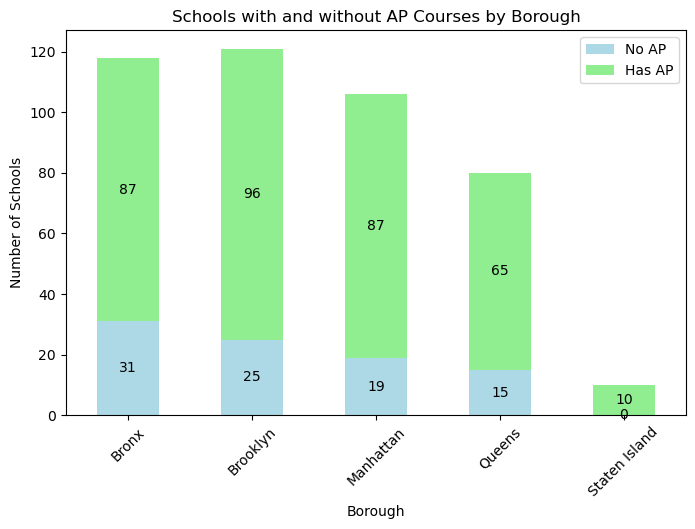

In [136]:
ap = ap_courses_by_borough.plot(kind='bar', stacked=True, figsize=(8,5), color=['lightblue', 'lightgreen'])
plt.title('Schools with and without AP Courses by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.legend(['No AP', 'Has AP'])

for container in ap.containers:
    ap.bar_label(container, label_type='center')
plt.show()

----------------------------------------------
## 7. Insights based on the NYC School Analysis Results

### 7.1 Insights based on the Amount of Schools in each Borough

Based on the findings, there is an uneven distribution of the number of schools across the boroughs, with Brooklyn having the most schools at 121 compared to Staten Island which only has 10 schools available. 

It may be worth looking at the residential populations of each borough to ensure that there are enough schools in each are to accomodate the students who live in each borough.

### 7.2 Insights based on the Distribution of AP Courses by School & Borough

Based on the findings, with the comparison between offered AP courses grouped by Boroughs I found that most boroughs have strong coverage of AP courses offered (including both online and in person courses). 

Brooklyn and Manhattan are the leading boroughs in the number of schools that provide access to AP courses.

Staten Island has a 100% percent coverage of AP courses in its schools however, there are only 10 schools in the Staten Island which is an outlier to the average amount of schools in the other boroughs of New York City.